# Creating final data for crop and fertilizer recommendation system

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving FertilizerData.csv to FertilizerData.csv


In [ ]:
merge_fert = pd.read_csv('FertilizerData.csv')

In [ ]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,maize,80,40,20,5.5
2,2,chickpea,40,60,80,5.5
3,3,kidneybeans,20,60,20,5.5
4,4,pigeonpeas,20,60,20,5.5


In [ ]:
del merge_fert['Unnamed: 0']

In [ ]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [ ]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

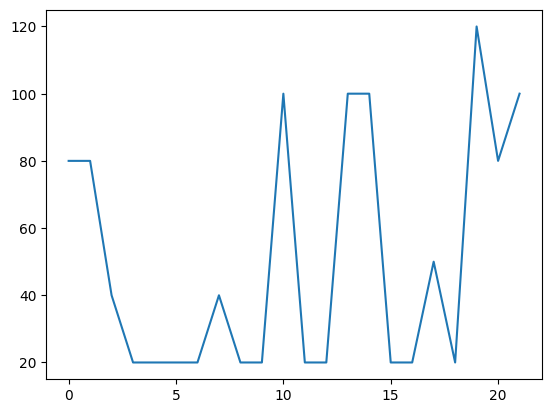

In [ ]:
plt.plot(merge_fert["N"])

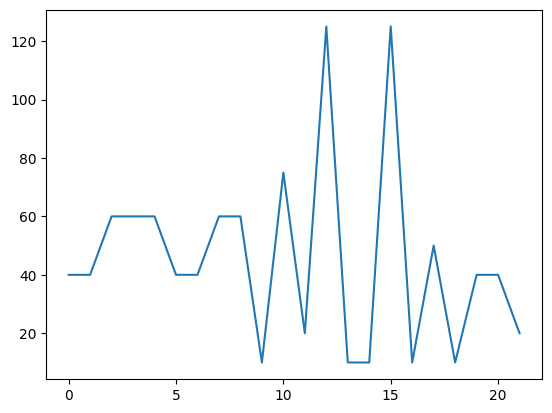

In [ ]:
plt.plot(merge_fert["P"])

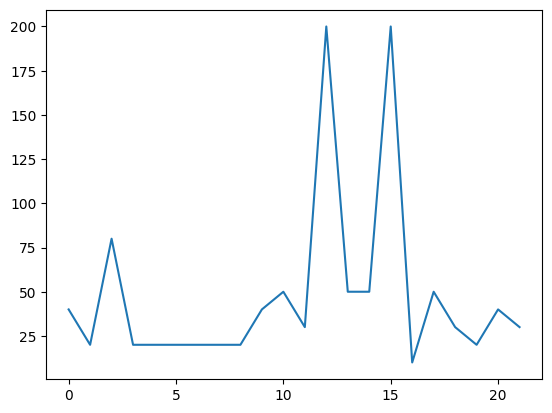

In [ ]:
plt.plot(merge_fert["K"])

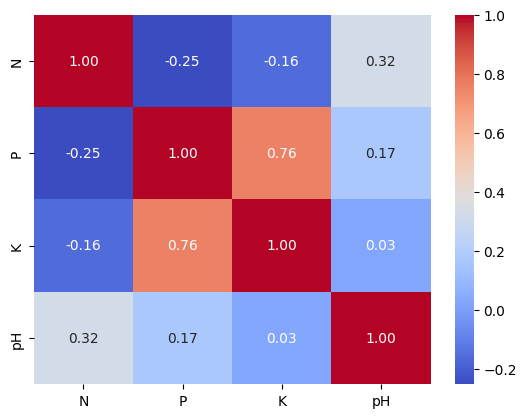

In [ ]:
# Select only numeric columns
numeric_data = merge_fert.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()

In [ ]:
uploaded = files.upload()

Saving MergeFileCrop.csv to MergeFileCrop.csv


In [ ]:
merge_crop = pd.read_csv('MergeFileCrop.csv')
reco_fert = merge_fert

In [ ]:
#Add +/-3 for every NPK value
import random
# Create an empty DataFrame with columns 'N', 'P', 'K'
temp = pd.DataFrame(columns=['N', 'P', 'K'])

# Iterate through each row of merge_crop DataFrame
for i in range(0, merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    # Get the values for N, P, K based on crop
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)

    # Create a dictionary with N, P, K values
    d = {"N": N, "P": P, "K": K}

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    temp = pd.concat([temp, pd.DataFrame([d])], ignore_index=True)

# Now temp will contain the new rows with random NPK values added

In [ ]:
temp

,N,P,K
0,95,50,36
1,93,53,37
2,73,49,42
3,81,46,37
4,63,37,38
...,...,...,...
2195,120,28,35
2196,107,32,33
2197,88,20,32
2198,92,17,27


In [ ]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [ ]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,95,50,36
1,1,21.770462,80.319644,7.038096,226.655537,rice,93,53,37
2,2,23.004459,82.320763,7.840207,263.964248,rice,73,49,42
3,3,26.491096,80.158363,6.980401,242.864034,rice,81,46,37
4,4,20.130175,81.604873,7.628473,262.717340,rice,63,37,38
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,120,28,35
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,107,32,33
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,88,20,32
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,92,17,27


In [ ]:
del merge_crop['Unnamed: 0']

In [ ]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,95,50,36
1,21.770462,80.319644,7.038096,226.655537,rice,93,53,37
2,23.004459,82.320763,7.840207,263.964248,rice,73,49,42
3,26.491096,80.158363,6.980401,242.864034,rice,81,46,37
4,20.130175,81.604873,7.628473,262.717340,rice,63,37,38
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,120,28,35
2196,27.417112,56.636362,6.086922,127.924610,coffee,107,32,33
2197,24.131797,67.225123,6.362608,173.322839,coffee,88,20,32
2198,26.272418,52.127394,6.758793,127.175293,coffee,92,17,27


In [ ]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
merge_crop.to_csv('/content/Crop Recommendation DataSet.zip',index=False)

In [ ]:
# Checking if everything went fine
df = pd.read_csv('/content/Crop Recommendation DataSet.zip')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,95,50,36,20.879744,82.002744,6.502985,202.935536,rice
1,93,53,37,21.770462,80.319644,7.038096,226.655537,rice
2,73,49,42,23.004459,82.320763,7.840207,263.964248,rice
3,81,46,37,26.491096,80.158363,6.980401,242.864034,rice
4,63,37,38,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)